In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale 

from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
df = pd.read_csv('C:\\Users\\sanuj\\OneDrive\\Desktop\\4th Year\\ST 4052 Statitics Learning\\Final Project\\Loan.csv')
df.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,Credit Card
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [31]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
Credit Card           0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [33]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
Credit Card             int64
dtype: object

In [34]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'Credit Card'],
      dtype='object')

Data Preprocessing

In [35]:
#Convert Negative Values in Experience into Positive
df['Experience']=df['Experience'].apply(lambda x :abs(x))

In [39]:
#After analyzing for outliers, these 2 observations are deleted (In Income Var)
df.drop(labels=[3896, 4993],axis=0,inplace=True)

KeyError: '[3896, 4993] not found in axis'

In [41]:
df=df.drop(['ID','ZIPCode'],axis=1) #ZIP Code contains non-unique values for ZIP Codes in USA
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,Credit Card
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


Label encoding for ordinal variable

In [42]:
df['Education'].unique()

array([1, 2, 3], dtype=int64)

In [43]:
label_encoder = LabelEncoder()
df['Education_encoded'] = label_encoder.fit_transform(df['Education'])
df = df.drop('Education', axis = 1)
df.head(5)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,Credit Card,Education_encoded
0,25,1,49,4,1.6,0,0,1,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1
4,35,8,45,4,1.0,0,0,0,0,0,1,1


Dummy encoding

In [45]:
dummy_col = ['Securities Account',
       'CD Account', 'Online', 'Credit Card']
df =pd.get_dummies(data = df, columns = dummy_col)

In [46]:
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Education_encoded,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,Credit Card_0,Credit Card_1
0,25,1,49,4,1.6,0,0,0,0,1,1,0,1,0,1,0
1,45,19,34,3,1.5,0,0,0,0,1,1,0,1,0,1,0
2,39,15,11,1,1.0,0,0,0,1,0,1,0,1,0,1,0
3,35,9,100,1,2.7,0,0,1,1,0,1,0,1,0,1,0
4,35,8,45,4,1.0,0,0,1,1,0,1,0,1,0,0,1


Adavanced Analysis

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

Stratified Shuffle split for keeping the percentage of each class constant
in situations where some classes are underrepresented. If the class distribution is not preserved during the split, you might end up with a training set that doesn't adequately represent the diversity of the original dataset, leading to biased model training and potentially poor generalization to unseen data.

In [49]:
X = df.drop('Personal Loan', axis = 1)
y = df[['Personal Loan']]

# Set the number of splits (you can adjust this)
n_splits = 1

# Initialize StratifiedShuffleSplit
stratified_splitter = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in stratified_splitter.split(X, y):
    trainx, testx = X.iloc[train_index], X.iloc[test_index]
    trainy, testy = y.iloc[train_index], y.iloc[test_index]

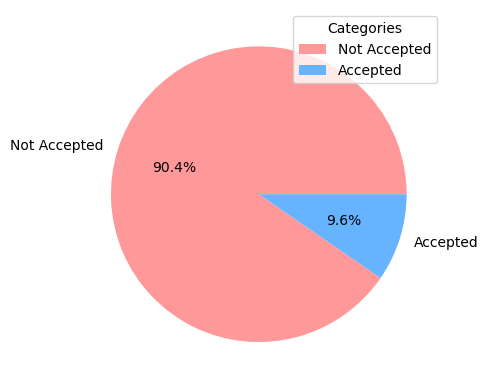

0    904
1     96
Name: Personal Loan, dtype: int64

In [50]:
counts = testy['Personal Loan'].value_counts()


custom_colors = ["#FF9999", "#66B3FF"]
plt.pie(counts, labels=['Not Accepted','Accepted'], colors=custom_colors, autopct='%1.1f%%')
plt.legend(title='Categories', labels=['Not Accepted','Accepted'])
plt.show()


testy['Personal Loan'].value_counts()

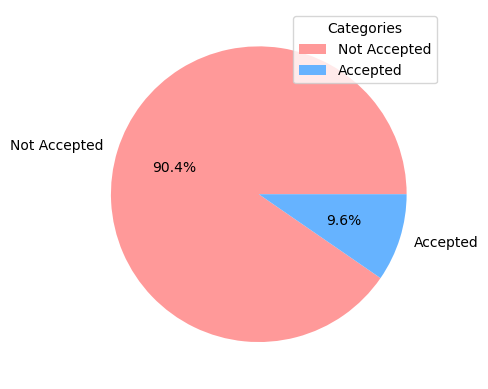

0    3614
1     384
Name: Personal Loan, dtype: int64

In [51]:
counts = trainy['Personal Loan'].value_counts()


custom_colors = ["#FF9999", "#66B3FF"]
plt.pie(counts, labels=['Not Accepted','Accepted'], colors=custom_colors, autopct='%1.1f%%')
plt.legend(title='Categories', labels=['Not Accepted','Accepted'])
plt.show()


trainy['Personal Loan'].value_counts()

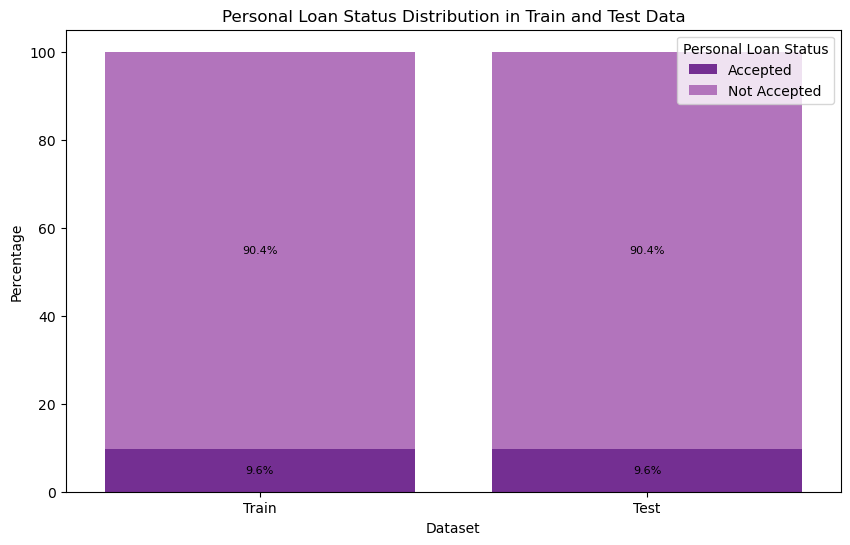

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Personal Loan' is the column name in your DataFrames trainy and testy
train_counts = trainy['Personal Loan'].value_counts(normalize=True) * 100
test_counts = testy['Personal Loan'].value_counts(normalize=True) * 100

# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({'Train': train_counts, 'Test': test_counts})

# Transpose the DataFrame for plotting
combined_counts = combined_counts.T

# Plot the stacked bar chart with percentage labels
plt.figure(figsize=(10, 6))

# Bar plot for 'Accepted' and 'Not Accepted' categories stacked for both Train and Test datasets
sns.barplot(x=['Train', 'Test'],
            y=[combined_counts.loc['Train', 1], combined_counts.loc['Test', 1]],
            color='#7b1fa2', label='Accepted')

sns.barplot(x=['Train', 'Test'],
            y=[combined_counts.loc['Train', 0], combined_counts.loc['Test', 0]],
            color='#ba68c8', label='Not Accepted', bottom=[combined_counts.loc['Train', 1], combined_counts.loc['Test', 1]])

# Add percentage labels for both categories
for i, (train_accepted, test_accepted) in enumerate(
        zip([combined_counts.loc['Train', 1], combined_counts.loc['Test', 1]],
            [combined_counts.loc['Train', 0], combined_counts.loc['Test', 0]])):
    plt.text(i, train_accepted / 2, f'{train_accepted:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(i, train_accepted + test_accepted / 2, f'{test_accepted:.1f}%', ha='center',
             va='center', color='black', fontsize=8)

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Percentage')
plt.title('Personal Loan Status Distribution in Train and Test Data')

# Show the legend
plt.legend(title='Personal Loan Status')

# Show the plot
plt.show()


Random Forest

SMOTE

In [78]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=0)
smote_x , smote_y = oversample.fit_resample(trainx , trainy)

# Display the class distribution after SMOTE
print(smote_y.value_counts())

Personal Loan
0                3614
1                3614
dtype: int64


In [79]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(trainx, trainy)

# Make predictions on the test set
y_pred = rf_classifier.predict(testx)

# Evaluate the model
accuracy = accuracy_score(testy, y_pred)
conf_matrix = confusion_matrix(testy, y_pred)
classification_rep = classification_report(testy, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


C:\Users\sanuj\AppData\Local\Temp\ipykernel_40680\2468959103.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(trainx, trainy)


Accuracy: 0.992
Confusion Matrix:
[[903   1]
 [  7  89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.99      0.93      0.96        96

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [80]:
# Create and train a Random Forest classifier on the resampled data
rf_classifier_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_resampled.fit(smote_x,smote_y)

C:\Users\sanuj\AppData\Local\Temp\ipykernel_40680\363443635.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_resampled.fit(smote_x,smote_y)


RandomForestClassifier(random_state=42)

In [85]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Make predictions on the original test data
y_pred_smote = rf_classifier_resampled.predict(testx)

# Calculate accuracy and F1 score
accuracy = accuracy_score(testy, y_pred_smote)
f1 = f1_score(testy, y_pred_smote)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

# Evaluate the model
accuracy = accuracy_score(testy, y_pred_smote)
conf_matrix = confusion_matrix(testy, y_pred_smote)
classification_rep = classification_report(testy, y_pred_smote)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')



Accuracy: 0.98
F1 Score: 0.91
Accuracy: 0.983
Confusion Matrix:
[[894  10]
 [  7  89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.90      0.93      0.91        96

    accuracy                           0.98      1000
   macro avg       0.95      0.96      0.95      1000
weighted avg       0.98      0.98      0.98      1000

